# Energies of an electron in a one-dimensional periodic potential

back to old version

In [1]:
%pylab inline

ModuleNotFoundError: No module named 'matplotlib'

$$cos(ka) = F =  P \frac{sin(\beta a)}{\beta a} + cos(\beta a)$$

Where 

$\beta = \frac{\sqrt(2mE)}{\hbar}$

and 

$P = \frac{m V_0 t a}{\hbar^2}$

We know that $cos(ka)$ must stay within the interval $[-1, 1]$.

In [4]:
hbar = 6.58211928e-16
me = 9.10938291e-31


def F(E, P):
    B = np.sqrt(2.0*me*E)/hbar
    return (P/B)*np.sin(B) + np.cos(B)    

def Ka(B, P):
    return np.arccos(F(B, P))

In [5]:
def draw_bands(plot, y, x, tol = 0.5):
    """
        Draws the bands by taking the limits where F goes outside [-1, 1],
        the presision of the numbers is not guarenteed, so F might never exactly 1 or -1.
        So look at the points for which F crosses these numbers.
    """
    span = np.linspace(-y.max(), y.max(), 1000)
    y_neg = y[(x > -1.01)&(x < -0.99)]
    y_pos = y[(x < 1.01)&(x > 0.99)]
    
    first = True
    
    cross_points_neg = []
    cross_points_pos = []

    for i in xrange(y_neg.size-1):
        if np.abs(y_neg[i+1] - y_neg[i]) > tol:
            cross_points_neg.append([y_neg[i], y_neg[i+1]])
            
    for i in xrange(y_pos.size-1):
        if np.abs(y_pos[i+1] - y_pos[i]) > tol:
            if first is True:
                first = False
            else:
                cross_points_pos.append([y_pos[i], y_pos[i+1]])

            
    cross_points_neg = np.array(cross_points_neg)
    cross_points_pos = np.array(cross_points_pos)
    
    cross_points_neg = cross_points_neg[::2]
    cross_points_pos = cross_points_pos[::2]
    
    for c in cross_points_neg:
        plot.fill_between(span, c[0], c[1], color='grey', alpha=0.2)
    
    for c in cross_points_pos:
        plot.fill_between(span, c[0], c[1], color='grey', alpha=0.2)
    

In [6]:
def band_struct(P = 4):
    
    E = np.linspace(0, 40, 500000)
    plt.figure(figsize=(16, 9))
    
    xfree = Ka(E, 0)
    yfree = E
    
    x = Ka(E, P)
    y = E
    
    xF = F(E, P)
    yF = E
    
    
    plt.xlim([-1, 1])
    plt.xlabel('$ \\frac{ka}{ \\pi }$', fontsize=18)
    plt.ylabel('$E\ (eV)$', fontsize=12)
    
    plt.plot(x/np.pi, y, 'b-')
    plt.plot(xfree/np.pi, y, 'g--', alpha=0.5)
    plt.plot(-x/np.pi, y, 'b-')
    plt.plot(-xfree/np.pi, y, 'g--', alpha=0.5)
    
    if P >= 1:
        draw_bands(plt, yF, xF, 0.0005)
        plt.legend(['electron', 'Free electron P = %1.1f'% P])
    else:
        plt.legend(['Free electron P = %1.1f'% P])
    
    plt.suptitle('Reduced zone band structure, P = %1.1f'% P, fontsize=16)

-c:7: RuntimeWarning: invalid value encountered in divide
-c:7: RuntimeWarning: divide by zero encountered in divide
-c:7: RuntimeWarning: invalid value encountered in multiply
-c:10: RuntimeWarning: invalid value encountered in arccos


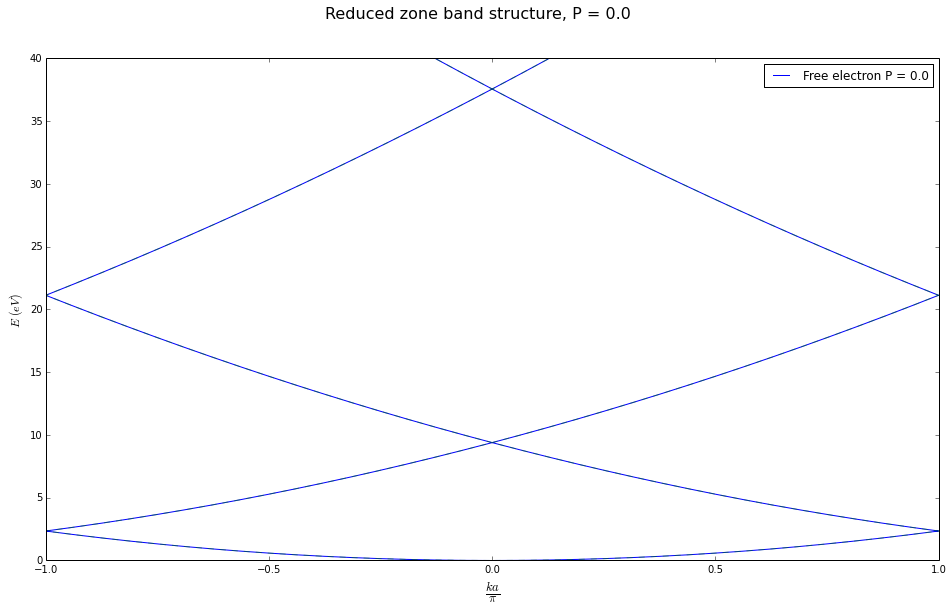

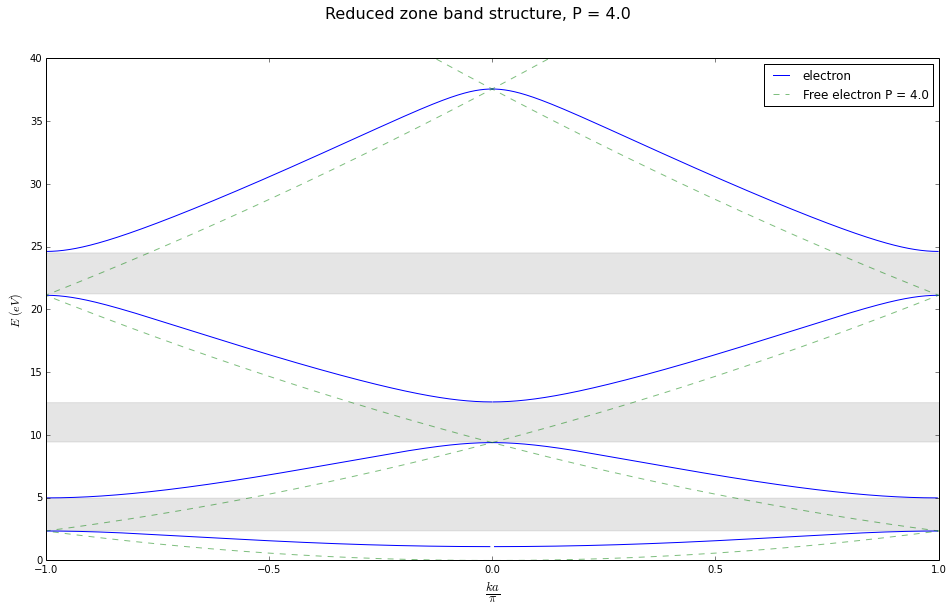

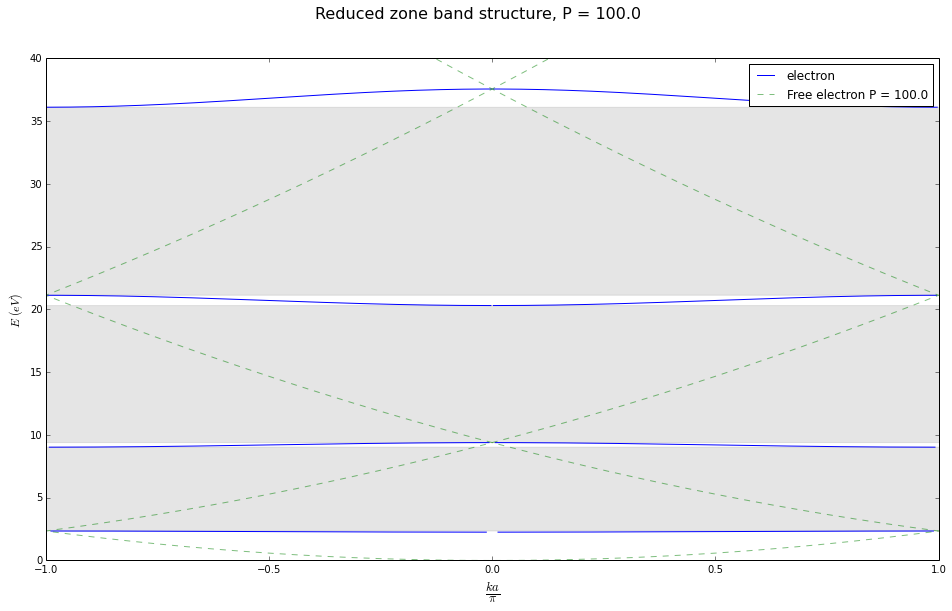

In [7]:
band_struct(0.0)
band_struct(4.0)
band_struct(100.0)

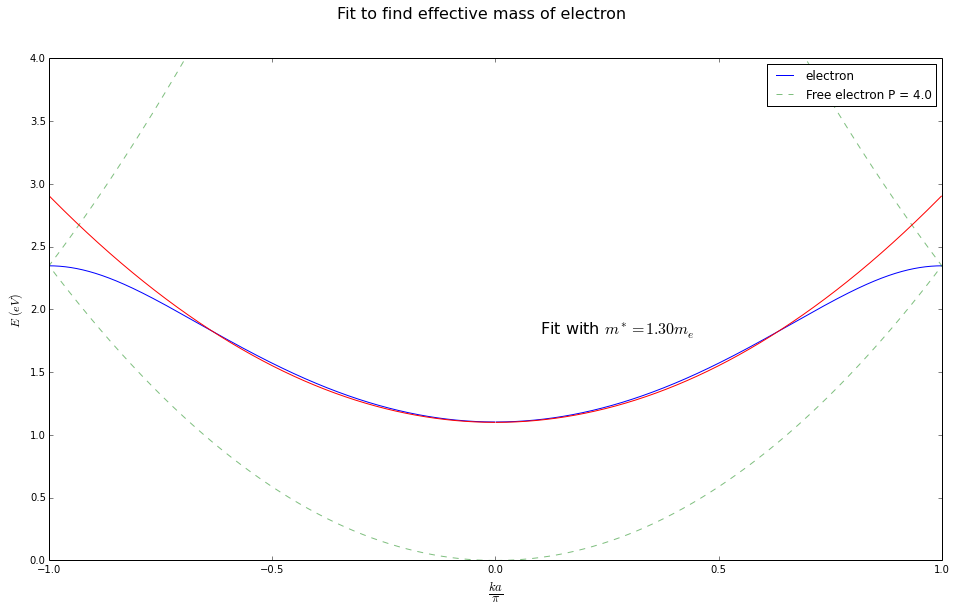

In [9]:
P = 4

E = np.linspace(0, 4, 500000)
plt.figure(figsize=(16, 9))

xfree = Ka(E, 0)
yfree = E

x = Ka(E, P)
y = E

xF = F(E, P)
yF = E


plt.xlim([-1, 1])
plt.xlabel('$ \\frac{ka}{ \\pi }$', fontsize=18)
plt.ylabel('$E\ (eV)$', fontsize=12)

plt.plot(x/np.pi, y, 'b-')
plt.plot(xfree/np.pi, y, 'g--', alpha=0.5)

plt.plot(-x/np.pi, y, 'b-')
plt.plot(-xfree/np.pi, y, 'g--', alpha=0.5)

a = 1.3
plt.plot(-x/np.pi, 1.1 + (hbar**2)*(x**2)/(2.0*a*me), 'r-')
plt.plot(x/np.pi, 1.1 + (hbar**2)*(x**2)/(2.0*a*me), 'r-')

plt.text(0.1, 1.8, 'Fit with $m^* = %1.2f m_e$'%a, fontsize = 16)


if P >= 1:
    draw_bands(plt, yF, xF, 0.0005)
    plt.legend(['electron', 'Free electron P = %1.1f'% P])
else:
    plt.legend(['Free electron P = %1.1f'% P])

plt.suptitle('Fit to find effective mass of electron', fontsize=16)

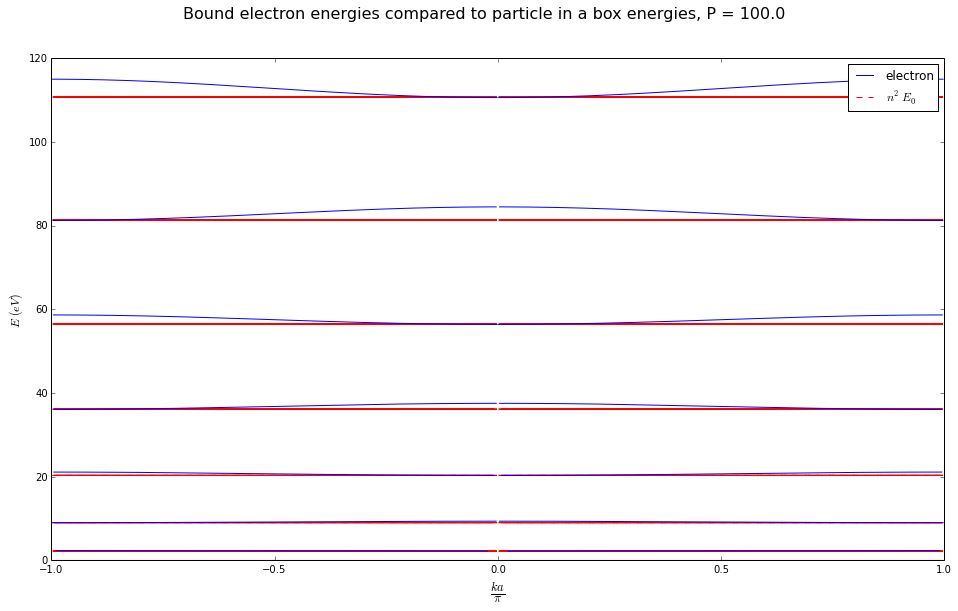

In [13]:
P = 100

E = np.linspace(0, 120, 1000000)
plt.figure(figsize=(16, 9))

E0 = 2.26

x = Ka(E, P)
y = E

plt.xlim([-1, 1])
plt.xlabel('$ \\frac{ka}{ \\pi }$', fontsize=18)
plt.ylabel('$E\ (eV)$', fontsize=12)

plt.plot([0], [0], 'b-')
plt.plot([0], [0], 'r--')

for i in xrange(8):
    plt.plot(x/np.pi, np.zeros_like(x) + (i**2)*E0, 'r--')
    plt.plot(-x/np.pi, np.zeros_like(x) + (i**2)*E0, 'r--')

    
plt.plot(x/np.pi, y, 'b-')
plt.plot(-x/np.pi, y, 'b-')

plt.legend(['electron', '$n^2E_0$'])
plt.suptitle('Bound electron energies compared to particle in a box energies, P = %1.1f'%P, fontsize=16)